<a href="https://colab.research.google.com/github/dudinkasg/Bootcamp_TurmaNoite/blob/main/23_12_23_projeto_aprendizado_n_o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto - aprendizado não supevisionado**


1- Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

2- Quantos países existem no dataset?

3- Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

4- Realize o pré-processamento adequado dos dados.

Clusterização

Para os dados pré-processados da etapa anterior você irá:

1- Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

  a- K-Médias
  
  b- Clusterização Hierárquica


2- Para os resultados, do K-Médias:

  a-Interprete cada um dos clusters obtidos citando:

    i- Qual a distribuição das dimensões em cada grupo;

    ii- O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.


3- Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.


4- Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
Escolha de algoritmos


1- Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

2- O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

3-  O algoritmo de K-médias é sensível a outliers nos dados. Explique.

4- Por que o algoritmo de DBScan é mais robusto à presença de outliers?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 #Importando dados
 url = '/content/drive/MyDrive/Infnet - Bootcamp/Country-data.csv'

In [ ]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [ ]:
#Atribuindo o banco de dados à uma variável
df = pd.read_csv(url)

In [ ]:
# Explorando inicialmente o Dataframe
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#Verificando os tipos de variáveis e número de entradas no Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Verificando se existem valores na no Dataframe
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
# Verificando se existem duplicatas no Dataframe
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [ ]:
# verificando quantos países (sem repetição) existem no Dataframe
df["country"].unique().size

167

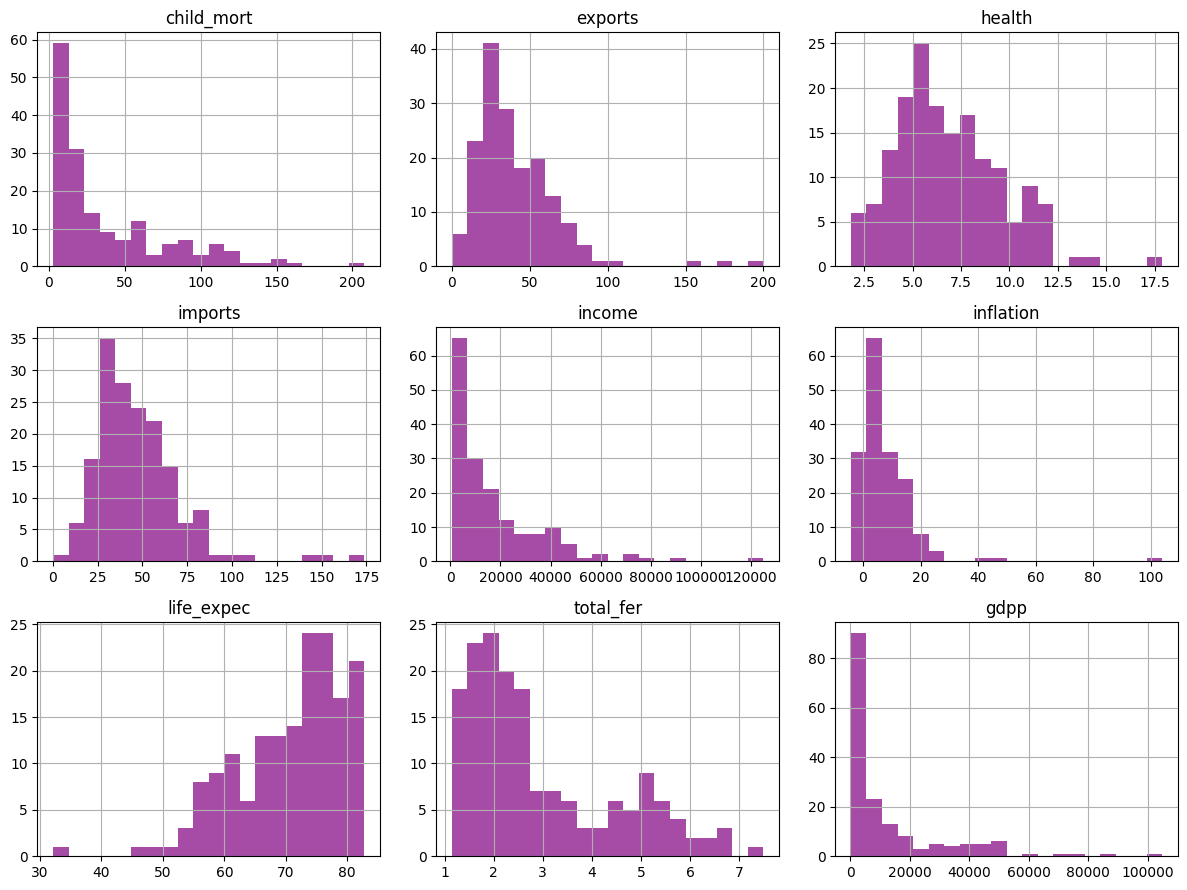

In [ ]:
# Mostrando as através de histogramas a faixa dinâmica das 9 variáveis que serão usadas na clusterização

colunas = df.columns[1:]

# Configuração do layout para exibir 3 gráficos por linha
num_colunas_por_linha = 3
num_linhas = len(colunas) // num_colunas_por_linha + (1 if len(colunas) % num_colunas_por_linha > 0 else 0)

# Configuração do tamanho da figura
fig, axs = plt.subplots(num_linhas, num_colunas_por_linha, figsize=(12, 3 * num_linhas))

# Flatten da matriz de subplots para facilitar o acesso
axs = axs.flatten()

# Iteração sobre as colunas e criação dos histogramas
for i, coluna in enumerate(colunas):
    ax = axs[i]
    ax.hist(df[coluna], bins=20, color='purple', alpha=0.7)
    ax.set_title(coluna)
    ax.grid(True)

# Ajustes finais para o layout
plt.tight_layout()
plt.show()

**Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
Realize o pré-processamento adequado dos dados.**

R. Os gráficos exibem as variáveis do dataframe no formato de histograma. É possível observar que a amplitude dos valores para cada variável é muito diversa. Portanto, é necessário normalizar as variáveis dentro de uma mesma faixa numérica para que aquelas com valores mais elevados não tenham um peso maior do que as que apresentam uma faixa de valores menor, influenciando no resultado do modelo de clusterização e podendo levar a resultados inconsistentes e interpretações equivocadas.

In [ ]:
# Separando as colunas numericas em um outro Dataframe que será normalizado e utilizado nas próximas etapas de clusterização
df_standar = df[df.columns[1:]]
df_standar

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
# Padronização dos dados pelo método Standarscaler - criando modelo
Scaler = StandardScaler().fit(df_standar)

In [ ]:
# Colocando todos os valores do Dataframe em uma mesma escala, utilizando o modelo StandarScaler criado na célula anterior
X = Scaler.transform(df_standar)

In [ ]:
# Criando um modelo utilizando o método K-Means
kmeans = KMeans(n_clusters= 3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [ ]:
# Predizendo os grupos de cada entrada do Dataframe utilizando o modelo K-Means criado na célula anterior
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [ ]:
uniq, counts = np.unique(y_kmeans, return_counts= True)

In [ ]:
# clusters definidos após a aplicação do método kmeans
uniq

array([0, 1, 2], dtype=int32)

In [ ]:
# dimensões dos clusters
counts

array([84, 36, 47])

In [ ]:
# adicionando o resultado da clusterização em uma série do dataframe
df_standar['cluster_kmeans'] = y_kmeans
df_standar.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [ ]:
# segunda forma de contar quantos países estão em cada grupo (dimensões em cada grupo)
df_standar.groupby('cluster_kmeans').size()

cluster_kmeans
0    84
1    36
2    47
dtype: int64

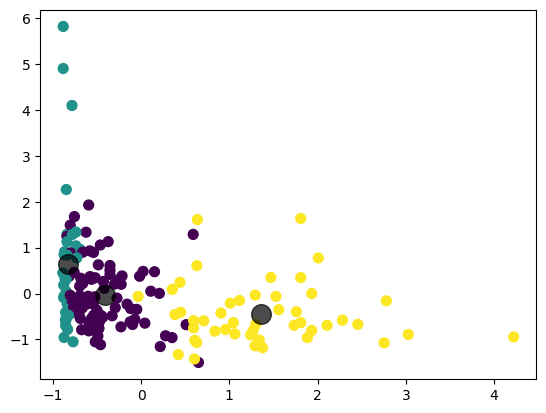

In [ ]:
# Verificando a distribuição dos clusters e dos centróides
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

In [ ]:
# Verificando as distãncias de cada amostra em relação ao seu cluster
dist_cent = kmeans.fit_transform(X)**2
dist_cent

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[  1.17959063,  33.4263992 ,  13.74546212],
       [ 12.9766085 ,  10.13805124,   0.70062052],
       [  9.81085648,  14.02034427,   2.0011834 ],
       [  5.14190122,  38.8766624 ,  18.69362974],
       [ 14.60131718,   6.25170839,   1.12898346],
       [ 13.60394296,  12.88004434,   4.68689944],
       [ 11.65707723,  14.24889347,   1.24345315],
       [ 29.56234093,   4.03043255,  12.78278558],
       [ 31.12141804,   0.88705572,  12.39082446],
       [  9.37581309,  12.6012245 ,   2.31876275],
       [ 15.689021  ,   3.650707  ,   2.84795197],
       [ 19.11499045,   4.10078928,   4.4662437 ],
       [  8.19768363,  20.7118433 ,   3.78148766],
       [ 15.03427453,   5.45357583,   1.5441977 ],
       [ 13.89447811,  10.68409766,   1.79323073],
       [ 32.03413802,   1.89804711,  13.49771119],
       [ 10.45618685,  11.53362859,   1.28306857],
       [  2.25665927,  32.3256368 ,  12.47467979],
       [  8.86872905,  13.73036832,   1.51476294],
       [  5.44942046,  15.57272

In [ ]:
# Somando todas as distâncias para cada instãncia
dist_cent_1 = dist_cent.sum(axis= 1)
dist_cent_1

array([ 48.35145195,  23.81528025,  25.83238414,  62.71219336,
        21.98200903,  31.17088674,  27.14942386,  46.37555906,
        44.39929822,  24.29580033,  22.18767998,  27.68202343,
        32.69101459,  22.03204806,  26.3718065 ,  47.42989633,
        23.27288401,  47.05697585,  24.1138603 ,  22.51520793,
        33.15426869,  24.99309517,  31.21696304,  66.70002001,
        22.86699059,  52.40243919,  60.31116781,  24.00850381,
        47.67002739,  45.65786063,  26.04999786,  80.78702915,
        70.49668061,  23.5604193 ,  28.09509071,  28.42711423,
        35.90815192,  59.99214521,  50.22731614,  30.2645823 ,
        46.01906795,  23.67918655,  29.77984587,  29.06773902,
        50.1694912 ,  21.28630787,  22.14258611,  25.15445688,
        22.28427327,  55.40981873,  44.90664088,  29.15575307,
        24.94261644,  36.91764416,  43.72002309,  33.67615164,
        36.99770061,  25.54335136,  43.11797317,  31.66228098,
        34.33908041,  22.4334713 ,  20.97048878,  47.66

In [ ]:
# Adicionando a informação da distância por amostra ao Dataframe
df_standar['dist'] = dist_cent_1

In [ ]:
# Verificando se existem valores repetidos nesta nova coluna de distância adicionada ao Dataframe
df_standar['dist'].duplicated().any()

False

In [ ]:
df_standar.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,dist
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,48.351452
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,23.815280
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,25.832384
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,62.712193
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,21.982009


In [ ]:
# descobrindo a menor distância de um país em relação ao centro do cluster 0
df_standar[df_standar['cluster_kmeans'] == 0]['dist'].min()

18.056235976427292

In [ ]:
# Descobrindo qual o index referente ao país com a distância mais próxima do centro do cluster 0
df_standar[df_standar['dist'] == 24.802020077251523]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,dist
72,36.9,39.4,8.41,34.1,12700,16.6,67.2,4.56,4500,2,24.80202


In [ ]:
# Descobrindo qual país representa melhor o cluster 0 através da menor distância (avaliada no código acima)
df.loc[72]

country        Iraq
child_mort     36.9
exports        39.4
health         8.41
imports        34.1
income        12700
inflation      16.6
life_expec     67.2
total_fer      4.56
gdpp           4500
Name: 72, dtype: object

In [ ]:
# descobrindo a menor distância de um país em relação ao centro do cluster 1
df_standar[df_standar['cluster_kmeans'] == 1]['dist'].min()

26.700787157224752

In [ ]:
# Descobrindo qual o index referente ao país com a distância mais próxima do centro do cluster 1
df_standar[df_standar['dist'] == 18.056235976427292]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,dist
143,24.1,52.5,7.01,38.4,14200,7.2,70.3,2.52,8300,0,18.056236


In [ ]:
# Descobrindo qual país representa melhor o cluster 1 através da menor distância (avaliada no código acima)
df.loc[143]

country       Suriname
child_mort        24.1
exports           52.5
health            7.01
imports           38.4
income           14200
inflation          7.2
life_expec        70.3
total_fer         2.52
gdpp              8300
Name: 143, dtype: object

In [ ]:
# descobrindo a menor distância de um país em relação ao centro do cluster 2
df_standar[df_standar['cluster_kmeans'] == 2]['dist'].min()

24.802020077251523

In [ ]:
# Descobrindo qual o index referente ao país com a distância mais próxima do centro do cluster 2
df_standar[df_standar['dist'] == 26.700787157224752]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,dist
74,4.6,35.0,7.63,32.9,29600,1.77,81.4,3.03,30600,1,26.700787


In [ ]:
# Descobrindo qual país representa melhor o cluster 2 através da menor distância (avaliada no código acima)
df.loc[74]

country       Israel
child_mort       4.6
exports         35.0
health          7.63
imports         32.9
income         29600
inflation       1.77
life_expec      81.4
total_fer       3.03
gdpp           30600
Name: 74, dtype: object

R. O país que melhor representa o cluster 0 é Iraque, o país que melhor representa o cluster 1 é Suriname e o país que melhor representa o cluster 2 é Israel. Esses países são os mais próximos do centro dos clusters e representam seu grupo porque o centróide é calculado como a média dos pontos do grupo. Dessa forma, o ponto mais próximo ao centróide tende a estar mais próximo da maioria dos outros pontos do cluster, podendo ser considerado um ponto representativo da estrutura  do conjunto de dados desse cluster. Entretanto, o ponto médio entre os pontos nem sempre é a forma mais adequada para representar todos os pontos do cluster, especialmente nos casos em que os clusters têm formas complexas ou que a distribuição dos pontos não são uniformes.

In [ ]:
# Avaliando a métrica silhouete para avaliar a eficiência da clusterização utilizando o método kmeans
silhouete_kmeans = silhouette_score(X, y_kmeans)
silhouete_kmeans

0.28329575683463126

In [ ]:
# Criando um modelo de Clusterização Hierárquica
hier_cust = AgglomerativeClustering(n_clusters= 3).fit(X)

In [ ]:
# Predizendo os grupos de cada entrada do Dataframe utilizando o modelo de clusterização hierárquica criado na célula anterior
y_hc = hier_cust.fit_predict(X)
y_hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

In [ ]:
# repetindo o y_kmeans para comparar a classficação das instâncias de acordo com cada método
y_kmeans

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

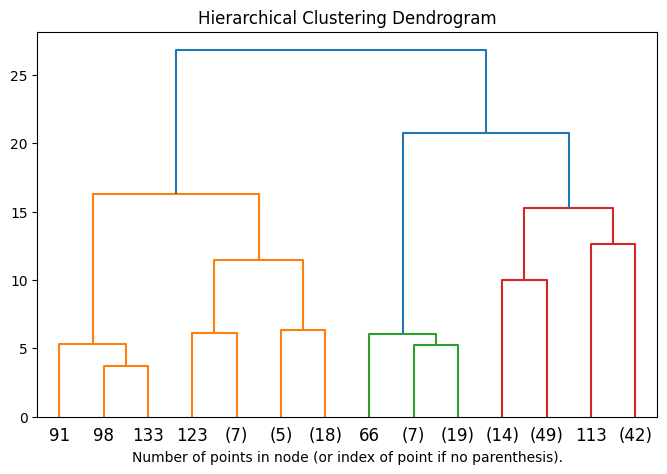

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.figure(figsize=(8, 5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# Avaliando a métrica silhouete para avaliar a eficiência da clusterização utilizando o método de clusterização hierárquica
silhouete_hc = silhouette_score(X, y_hc)
silhouete_hc

0.24563001303300652

In [ ]:
# repetindo o o código de silhueta kmeans para comparar a com a mesma metrica obtida para clusterização hierárquica (código acima0)
silhouete_kmeans

0.28329575683463126

In [ ]:
# adicionando o resultado da clusterização ao dataframe original
df['cluster_kmeans'] = y_kmeans
df['cluster_ch'] = y_hc
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_ch
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [ ]:
# Verificar se os países de cada grupo classificados pelo modelo kmeans são iguais aos obtidos pelo modelo de clusterização hierárquica

kmeans_data = df[['country', 'cluster_kmeans']]
ch_data = df[['country', 'cluster_ch']]

# Criando dicionários de mapeamento de rótulos para países
kmeans_mapping = {}
ch_mapping = {}

# Mapeando rótulos para países no modelo de kmeans
for index, row in kmeans_data.iterrows():
    country, label = row['country'], row['cluster_kmeans']
    kmeans_mapping.setdefault(label, []).append(country)

# Mapeando rótulos para países no modelo de clusterização hierárquica
for index, row in ch_data.iterrows():
    country, label = row['country'], row['cluster_ch']
    ch_mapping.setdefault(label, []).append(country)

# Iterando sobre os rótulos da clusterização hierárquica
for label_ch, paises_ch in ch_mapping.items():
    # Selecionar os países associados ao rótulo da clusterização hierárquica
    paises_rotulo_ch = set(paises_ch)

    # Verificando se o grupo 0 do k-means é igual ao grupo da clusterização hierárquica
    if paises_rotulo_0_kmeans == paises_rotulo_ch:
        print(f'O grupo 0 do k-means é igual ao grupo {label_ch} da clusterização hierárquica.')

    # Verificando se o grupo 1 do k-means é igual ao grupo da clusterização hierárquica
    elif paises_rotulo_1_kmeans == paises_rotulo_ch:
        print(f'O grupo 1 do k-means é igual ao grupo {label_ch} da clusterização hierárquica.')

    # Verificando se o grupo 2 do k-means é igual ao grupo da clusterização hierárquica
    elif paises_rotulo_2_kmeans == paises_rotulo_ch:
        print(f'O grupo 2 do k-means é igual ao grupo {label_ch} da clusterização hierárquica.')

# Se nenhum grupo equivalente for encontrado
print('Nenhum grupo do k-means é igual a algum grupo da clusterização hierárquica.')

Nenhum grupo do k-means é igual a algum grupo da clusterização hierárquica.


In [ ]:
# Mapear rótulos para países no modelo de kmeans
for index, row in kmeans_data.iterrows():
    country, label = row['country'], row['cluster_kmeans']
    kmeans_mapping.setdefault(label, []).append(country)

# Mapear rótulos para países no modelo de clusterização hierárquica
for index, row in ch_data.iterrows():
    country, label = row['country'], row['cluster_ch']
    ch_mapping.setdefault(label, []).append(country)

# Inicializar variáveis para armazenar os resultados
resultados = {}

# Iterar sobre os rótulos dos grupos do k-means
for label_kmeans in range(3):  # Assumindo que há 3 grupos no k-means
    # Selecionar os países associados ao rótulo do k-means
    paises_rotulo_kmeans = set(kmeans_mapping.get(label_kmeans, []))

    # Inicializar variáveis para armazenar a maior similaridade e o rótulo correspondente da clusterização hierárquica
    maior_similaridade = 0
    rotulo_mais_parecido = None

    # Iterar sobre os rótulos da clusterização hierárquica
    for label_ch, paises_ch in ch_mapping.items():
        # Selecionar os países associados ao rótulo da clusterização hierárquica
        paises_rotulo_ch = set(paises_ch)

        # Calcular a similaridade de Jaccard
        similaridade = len(paises_rotulo_kmeans.intersection(paises_rotulo_ch)) / len(paises_rotulo_kmeans.union(paises_rotulo_ch))

        # Atualizar a variável se a similaridade atual for maior
        if similaridade > maior_similaridade:
            maior_similaridade = similaridade
            rotulo_mais_parecido = label_ch

    # Verificar os países diferentes entre os dois grupos
    paises_diferentes = paises_rotulo_kmeans.symmetric_difference(set(ch_mapping.get(rotulo_mais_parecido, [])))

    # Armazenar os resultados
    resultados[label_kmeans] = {
        'rotulo_mais_parecido': rotulo_mais_parecido,
        'maior_similaridade': maior_similaridade,
        'paises_diferentes': paises_diferentes
    }

# Exibir os resultados
for label_kmeans, resultado in resultados.items():
    print(f"\nPara o grupo {label_kmeans} do k-means:")
    print(f"Grupo mais parecido da clusterização hierárquica: {resultado['rotulo_mais_parecido']}")
    print(f"Maior similaridade: {resultado['maior_similaridade']:.2f}")
    print(f'Países diferentes entre os dois grupos:')
    print(resultado['paises_diferentes'])


Para o grupo 0 do k-means:
Grupo mais parecido da clusterização hierárquica: 1
Maior similaridade: 0.74
Países diferentes entre os dois grupos:
{'Ghana', 'Libya', 'South Korea', 'Angola', 'Czech Republic', 'Kiribati', 'Oman', 'Lao', 'Sudan', 'Iraq', 'Liberia', 'Botswana', 'Namibia', 'Equatorial Guinea', 'Pakistan', 'Slovak Republic', 'Timor-Leste', 'Eritrea', 'Yemen', 'Congo, Rep.', 'Mauritania', 'Lesotho', 'Nigeria', 'South Africa', 'Saudi Arabia', 'Gabon', 'Cyprus', 'Slovenia'}

Para o grupo 1 do k-means:
Grupo mais parecido da clusterização hierárquica: 0
Maior similaridade: 0.79
Países diferentes entre os dois grupos:
{'Libya', 'South Korea', 'Czech Republic', 'Slovak Republic', 'Oman', 'Saudi Arabia', 'Slovenia', 'Cyprus'}

Para o grupo 2 do k-means:
Grupo mais parecido da clusterização hierárquica: 2
Maior similaridade: 0.57
Países diferentes entre os dois grupos:
{'Ghana', 'Pakistan', 'Angola', 'Kiribati', 'Timor-Leste', 'Eritrea', 'Lao', 'Yemen', 'Sudan', 'Iraq', 'Liberia', 'C

In [ ]:
# Filtrando o DataFrame principal pelos países clusterizados em grupos diferentes segundo os dois métodos
paises_diferentes_total = set(paises_diferentes)
for resultado in paises_diferentes:
    paises_diferentes_total.update(resultado)

df[df['country'].isin(paises_diferentes_total)]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_ch
3,Angola,119.0,62.30,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.92,57.1,2.88,6350,2,1
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.70,60.4,4.95,2740,2,1
49,Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.90,60.9,5.21,17100,2,1
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,2,1
55,Gabon,63.7,57.70,3.50,18.9,15400,16.60,62.9,4.08,8750,2,1
59,Ghana,74.7,29.50,5.22,45.9,3060,16.60,62.2,4.27,1310,2,1
72,Iraq,36.9,39.40,8.41,34.1,12700,16.60,67.2,4.56,4500,2,1
81,Kiribati,62.7,13.30,11.30,79.9,1730,1.52,60.7,3.84,1490,2,1
84,Lao,78.9,35.40,4.47,49.3,3980,9.20,63.8,3.15,1140,2,1


 **Compare os dois resultados, aponte as semelhanças e diferenças e interprete.**

 **R:** Avaliando os valores da métrica de silhueta, podemos interpretar que o método kmeans apresentou um agrupamento mais preciso para este dataset, quando comparado ao mpetodo de clusterização hierárquica. A métrica de silhueta é uma medida de quão bem um objeto foi classificado em seu cluster em comparação com outros clusters. Ela fornece uma indicação da qualidade da clusterização. O valor da silhueta varia de -1 a 1, onde um valor mais alto indica que o objeto está bem ajustado ao seu próprio cluster e mal ajustado aos clusters vizinhos.

 Analisando também os grupos obtidos após a classificação pelos dois modelos, foi possível ver que os países foram classificados de maneira diferentes. Uma possível causa para isto pode ser a existência de valores de dados socioeconimicos e de saúde muito próximo aos limítrofes para a determinação de cada grupo. Em outras palavras, são países que estão presentes em pontos mais extremos de seus clusters e próximos a outro grupo, de modo que os parâmetros de corte utilizados por cada modelo (kmeans e clusetrização hierárquica) designam esses pontos para grupos diferentes do predito por outro método.

 Observando os gráficos de cada análise, podemos ver a presença de dois grupos mais próximos (verde e roxo no scatter plott e vermelho e verde no dendograma) e um mais afastado (amarelo no scatter plot e laranja no dendograma). Isso mostra que os dois grupos mais próximos apresentam maior similiaridade entre si quanto aos índices apresentados no banco, mas com diferenças suficientes para serem classificados como grupos distintos.

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_ch
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,1


In [ ]:
df_pca = df[df.columns[1:]]

In [ ]:
# Utilizando a abordagem de PCA para transformar e compactar os dados para auxiliar o modelo mais simples e que possa dar um resultado melhor
pca = PCA(n_components= 2).fit(df_pca)
projected = pca.transform(df_pca)

In [ ]:
# Conferindo as dimensões dos dados após a aplicação do método PCA
print(df_pca.shape)
print(projected.shape)

(167, 11)
(167, 2)


In [ ]:
# verificando a conservaçãp da variância
print(pca.explained_variance_ratio_)

[0.94792306 0.05207346]


Text(0, 0.5, 'component 2')

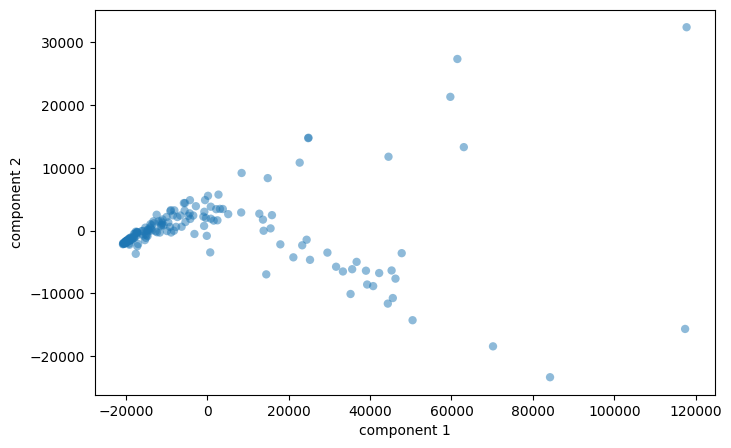

In [ ]:
# Projetando os dados em duas dimensões após o PCA
from matplotlib import figure
plt.figure(figsize=(8,5))
plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
# plt.colorbar();

<ipython-input-276-ec2c4a292d74>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0], projected[:, 1],c=y_kmeans, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 3))


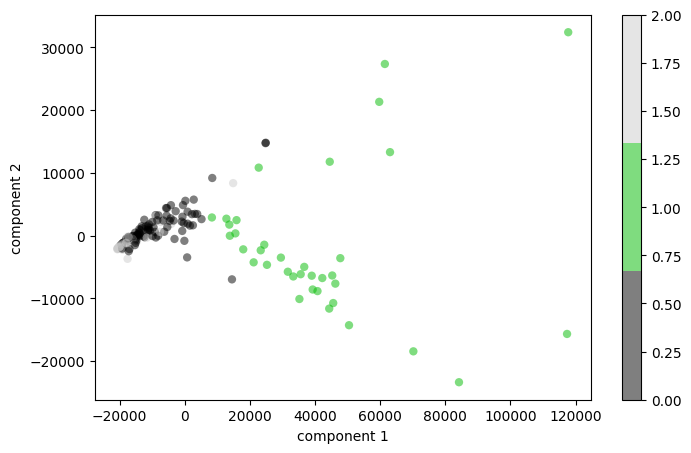

In [ ]:
# Projetando os dados transformados pelo modelo kmeans
plt.figure(figsize=(8,5))
plt.scatter(projected[:, 0], projected[:, 1],c=y_kmeans, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

<ipython-input-277-0b765ff731b5>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0], projected[:, 1],c=y_hc, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 3))


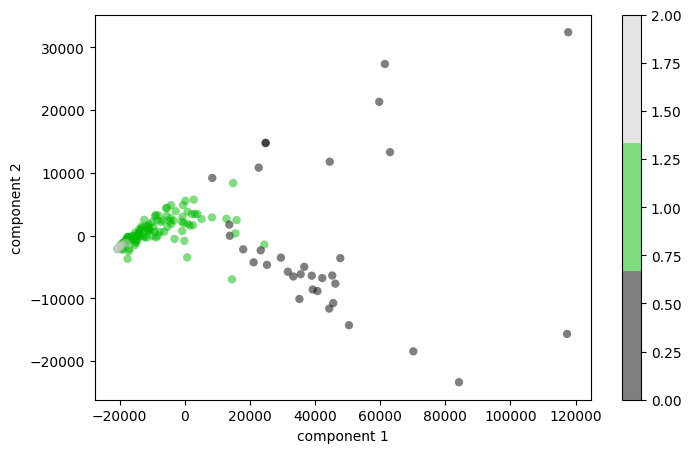

In [ ]:
# Projetando os dados transformados pelo modelo de clusterização hierárquica
plt.figure(figsize=(8,5))
plt.scatter(projected[:, 0], projected[:, 1],c=y_hc, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.**

**R:** É um algoritmo de aprendizado não supervisionado que clusteriza os dados de acordo com suas características As principais etapas do algoritmoconistem em:

- Escolha do número de clusters que deseja formar (k).
- Definição aleatória de centróides, sendo um para cada cluster.
- Cada ponto de dado é classificado em um cluster, cujo centróide seja o mais próximo.
- Repoiscionamento de centróides com base na média dos pontos atribuídos a esse cluster.
- A convergência é feita pela repetição das etapas de classificação de pontos aos clusters com base na nova posição dos centróides e do cálculo das médias das distâncias ao centróides, até que não haja mais mudanças nas atribuições de clusters ou até que o número máximo de iterações seja atingido.
- Os clusters formados são os conjuntos de pontos de dados atribuídos aos mesmos centróides.


**O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.**

**R.** anulada

**O algoritmo de K-médias é sensível a outliers nos dados. Explique.**

**R:** O algoritmo de K-médias é sensível a outliers nos dados devido à maneira como ele calcula os centróides e atribui pontos aos clusters. Algumas razões pelas quais outliers podem impactar o desempenho do K-médias são:

- Os centróides são calculados como a média dos pontos em um cluster. Se um cluster contiver outliers, a média pode ser puxada significativamente em direção a esses valores extremos. Isso pode resultar em centróides que não estão no centro real da maioria dos pontos do cluster, influenciando a interpretação do cluster.

- A sensibilidade do K-médias às inicializações aleatórias dos centróides pode ser exacerbada pela presença de outliers. Diferentes inicializações podem resultar em diferentes configurações finais, e outliers podem influenciar em qual configuração é escolhida.

- Outliers podem levar a uma convergência mais lenta, pois os centróides podem precisar ser ajustados várias vezes antes que o algoritmo estabilize.

Para mitigar os efeitos de outliers, pode ser útil considerar técnicas de pré-processamento de dados, como normalização, padronização ou até mesmo a identificação e remoção de outliers antes de aplicar o algoritmo de K-médias.


**Por que o algoritmo de DBScan é mais robusto à presença de outliers?**

**R:** O algoritmo DBScan (Density-Based Spatial Clustering of Applications with Noise) é mais robusto à presença de outliers porque este método define clusters com base na densidade de pontos em uma determinada região, em vez de assumir que os clusters têm uma forma específica. Como resultado, regiões com baixa densidade de pontos, como aquelas que contêm outliers, podem ser identificadas como ruído e não são forçadas a fazer parte de um cluster, evitando que outliers influenciem a formação dos clusters. Além disso, o DBScan tem parâmetros ajustáveis, não requerendo que o número de clusters seja especificado antecipadamente, o que o torna mais flexível quando a distribuição dos dados não é conhecida. O algoritmo pode automaticamente encontrar densidades significativas de pontos e agrupá-los em clusters. O raio da vizinhança e o número mínimo de pontos também podem ser alterados para controlar a sensibilidade do algoritmo à densidade local.

